<a href="https://colab.research.google.com/github/AnirudhKGarg/Music-Genre-Classification-using-lyrics/blob/master/ECE_313_HW2_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#relevant libraries
import numpy as np #math and simulation
import pandas as pd #dataframes
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting

In [3]:
simulations = np.array([1, 10, 100, 1000, 10000, 100000]) #number of trials in the simulation as an array

simulations_q6 = simulations[2:5] #the specific values form Question 6

#this function returns a dataframe with outcomes of a die roll and the counts of each outcome across different rolls
def dice_rolls(n):
    sample_space = np.array([1, 2, 3, 4, 5, 6])
    dfs = []

    for i in n:
        sample = np.random.choice(sample_space, i) #samples from the sample space (sample_space), i times

        unique, count = np.unique(sample, return_counts = True)

        result = pd.DataFrame(count, index = unique, columns = [str(i) + "_Simulations"])
        dfs.append(result)

    df = pd.concat(dfs, axis=1)
    df.index.name = "Outcomes"
    df = df.fillna(0).astype(int) #makesure we have counts of 0 and all values are integers
    df.sort_index(inplace=True) #makesure that the outcomes are properly sorted


    return df

dice_rolls(n = simulations) #test a wide arrangment of values just to be sure


,1_Simulations,10_Simulations,100_Simulations,1000_Simulations,10000_Simulations,100000_Simulations
Outcomes,,,,,,
1,0,0,18,189,1641,16677
2,0,2,21,173,1670,16638
3,0,1,12,164,1731,16696
4,0,3,21,175,1642,16617
5,0,2,15,158,1703,16599
6,1,2,13,141,1613,16773


In [4]:
#we want to create a function to create an empirical distribution of the simulations sach that the frequency outcomes are shown as a fraction of n simulations instead of counts
def empirical_distribution(n):
    counts_df = dice_rolls(n)
    total_trials = counts_df.sum()
    empirical_df =  counts_df.apply(lambda x: x / total_trials[x.name]).round(4)
    empirical_dist = counts_df.apply(lambda x: x.apply(lambda y: f"{y} / {total_trials[x.name]}"))

    return empirical_df, empirical_dist #this way you can see it both as a frequency (decimals) fraction (string)

empirical_distribution(n = simulations_q6)


(          100_Simulations  1000_Simulations  10000_Simulations
 Outcomes                                                      
 1                    0.20             0.170             0.1682
 2                    0.16             0.179             0.1630
 3                    0.15             0.153             0.1671
 4                    0.11             0.146             0.1645
 5                    0.22             0.177             0.1693
 6                    0.16             0.175             0.1679,
          100_Simulations 1000_Simulations 10000_Simulations
 Outcomes                                                   
 1               20 / 100       170 / 1000      1682 / 10000
 2               16 / 100       179 / 1000      1630 / 10000
 3               15 / 100       153 / 1000      1671 / 10000
 4               11 / 100       146 / 1000      1645 / 10000
 5               22 / 100       177 / 1000      1693 / 10000
 6               16 / 100       175 / 1000      1679 / 10000

([(<Figure size 640x480 with 1 Axes>,
   <Axes: title={'center': 'Frequency_100_Simulations'}, xlabel='Outcomes of a Die Roll', ylabel='Frequency'>),
  (<Figure size 640x480 with 1 Axes>,
   <Axes: title={'center': 'Frequency_1000_Simulations'}, xlabel='Outcomes of a Die Roll', ylabel='Frequency'>),
  (<Figure size 640x480 with 1 Axes>,
   <Axes: title={'center': 'Frequency_10000_Simulations'}, xlabel='Outcomes of a Die Roll', ylabel='Frequency'>)],
 None)

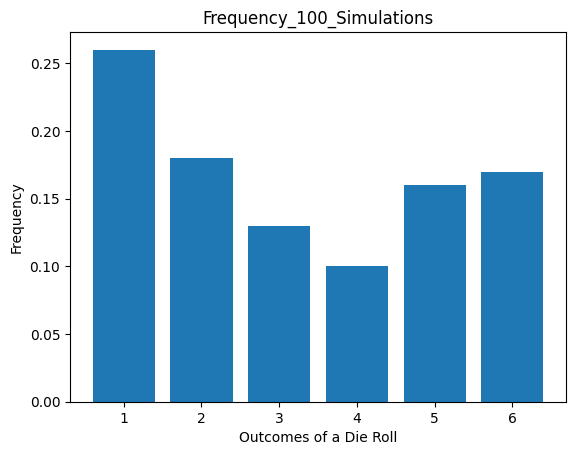

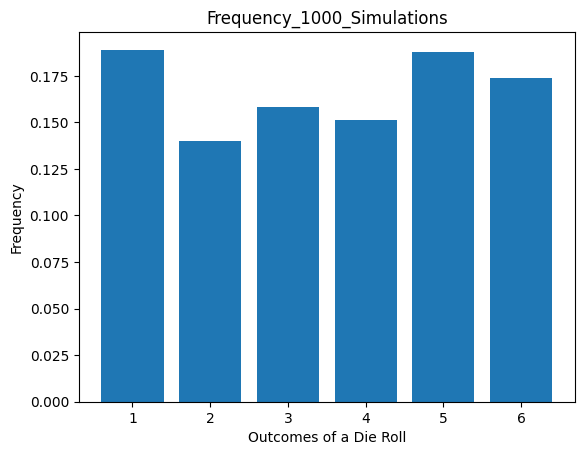

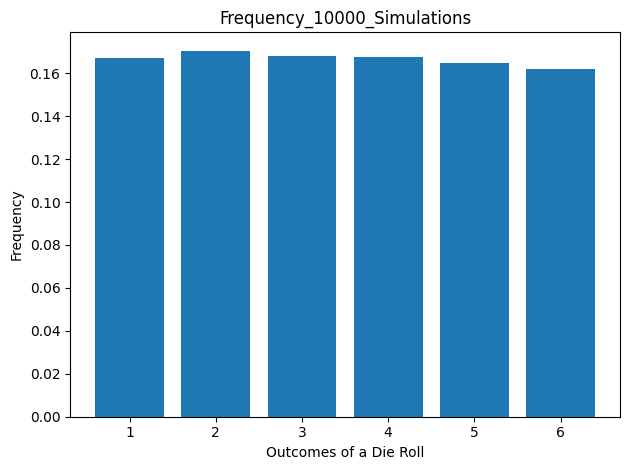

In [13]:
#this is the function that plots the histograms
def histograms(n):
    empirical_df, _ = empirical_distribution(n)

    plot_list = []

    for col_name in empirical_df.columns:
        fig, ax = plt.subplots()
        ax.bar(empirical_df.index, empirical_df[col_name])
        ax.set_xlabel("Outcomes of a Die Roll")
        ax.set_ylabel("Frequency")
        ax.set_title(f"Frequency_{col_name}")
        plot_list.append((fig, ax))



    return plot_list

histograms(n = simulations_q6)


As the number of trials (n) in our simulation increases, the distribution of the frequencies for all the outcomes of the die begins to approach the uniform distribution expected from the probability density function (PDF) of a single fair die roll.